<a href="https://colab.research.google.com/github/Nathalia-Prada/proyecto-integrador-equipo25/blob/main/Avance2Equipo25%20/Avance2Equipo25_Ingenier%C3%ADa_de_caracter%C3%ADsticas_Tabla_Unida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance 2. Ingeniería de características**

Objetivos:

- 2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

- 2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.



###**Equipo 25**


### Estudiantes


* A01793899 - Andrés Julián López Hurtado
* A01793999 - Nathalia Milena Prada Hernández
* A01794404 - Victor Alejandro Regueira Romero

Fecha: 6 de octubre de 2024

# Instrucciones
Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

En esta fase, conocida como ingeniería de características (FE - Feature Engineering):

Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:
Generación de nuevas características
Discretización o binning
Codificación (ordinal, one hot,…)
Escalamiento (normalización, estandarización, min – max,…)
Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)

* Todas las decisiones y técnicas empleadas deben ser justificadas.



Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:
Umbral de varianza
Correlación
Chi-cuadrado
ANOVA
Análisis de componentes principales (PCA)
Análisis factorial (FA)
* Es necesario fundamentar los métodos ejecutados.



Incluir conclusiones de la fase de "Preparación de los datos" en el contexto de la metodología CRISP-ML.

# Importar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Importando las librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns  # Para un mejor despliegue de los gráficos


# Rutas de archivos y carga de la base

In [ ]:
file_tabla_unida = '/content/drive/MyDrive/TECForza/df_union2.csv'

In [ ]:
df_tabla_unida = pd.read_csv(file_tabla_unida)
df_tabla_unida.head()

,name,date,total_distance_used_sum,total_fuel_used_sum,consumption,performance,distance,idlingDuration,idlingPercent,idlingDuration_hours,...,ExcessiveSpeedingCount,ExcessiveSpeedingDistance,HardAccelerationCount,HardAccelerationDistance,HarshBrakingCount,HarshBrakingDistance,HarshCorneringDuration,HarshCorneringCount,HarshCorneringDistance,MaxSpeed
0,986,2024-07-01,115.575006,15.321976,7.543088,0.132572,30.063228,08:12:02,87.0,8.20,...,159.0,50.848373,133.0,0.057267,1.0,0.000096,0.0,43.0,0.006195,83.885109
1,1038,2024-07-01,167.770170,25.096340,6.685045,0.149588,72.647624,06:53:43,62.0,6.90,...,19.0,2.382248,17.0,0.002865,0.0,0.000000,0.0,28.0,0.002594,76.428658
2,502,2024-07-02,1025.262150,68.948892,8.653096,0.067250,912.121800,11:00:31,46.0,11.01,...,105.5,38.452164,48.0,0.020623,0.5,0.000332,0.0,39.5,0.009367,42.874611
3,532,2024-07-02,1103.554896,75.817364,14.555437,0.068703,554.235964,01:34:01,14.0,1.57,...,3.5,0.055369,77.5,0.065764,0.0,0.000000,0.0,18.5,0.007460,38.835701
4,880,2024-07-02,857.491980,64.193796,13.357864,0.074862,429.840038,20:46:51,73.0,20.78,...,402.0,123.554245,59.0,0.020675,0.0,0.000000,0.0,37.0,0.020335,83.885109


In [ ]:
df_tabla_unida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43033 entries, 0 to 43032
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       43033 non-null  int64  
 1   date                       43033 non-null  object 
 2   total_distance_used_sum    43033 non-null  float64
 3   total_fuel_used_sum        43033 non-null  float64
 4   consumption                43033 non-null  float64
 5   performance                43033 non-null  float64
 6   distance                   43033 non-null  float64
 7   idlingDuration             43033 non-null  object 
 8   idlingPercent              43033 non-null  float64
 9   idlingDuration_hours       43033 non-null  float64
 10  CurrentFuelPrice           43033 non-null  float64
 11  IdlingCost                 43033 non-null  float64
 12  SpeedLimit1Count           43033 non-null  float64
 13  SpeedLimit2Count           43033 non-null  flo

In [ ]:
df_tabla_unida.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,43033.0,NaN,NaN,NaN,838.455162,241.557927,24.0,642.0,844.0,1050.0,1350.0
date,43033,61,2024-07-24,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_distance_used_sum,43033.0,NaN,NaN,NaN,615.838787,432.435395,0.621371,334.918969,569.175836,787.277057,3396.413886
total_fuel_used_sum,43033.0,NaN,NaN,NaN,60.643512,35.692618,0.264172,33.814016,59.967044,81.100804,234.320564
consumption,43033.0,NaN,NaN,NaN,8.447389,2.193983,0.039202,7.556606,8.547666,8.956657,14.86505
performance,43033.0,NaN,NaN,NaN,0.149598,0.510668,0.000302,0.084446,0.116991,0.132335,25.508625
distance,43033.0,NaN,NaN,NaN,307.268734,322.884856,0.0,0.0,235.023378,529.604197,1758.667149
idlingDuration,43033,18663,0,11912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idlingPercent,43033.0,NaN,NaN,NaN,25.529036,26.134782,0.0,0.0,17.0,47.0,100.0
idlingDuration_hours,43033.0,NaN,NaN,NaN,3.806658,5.256458,0.0,0.0,1.01,5.82,23.96


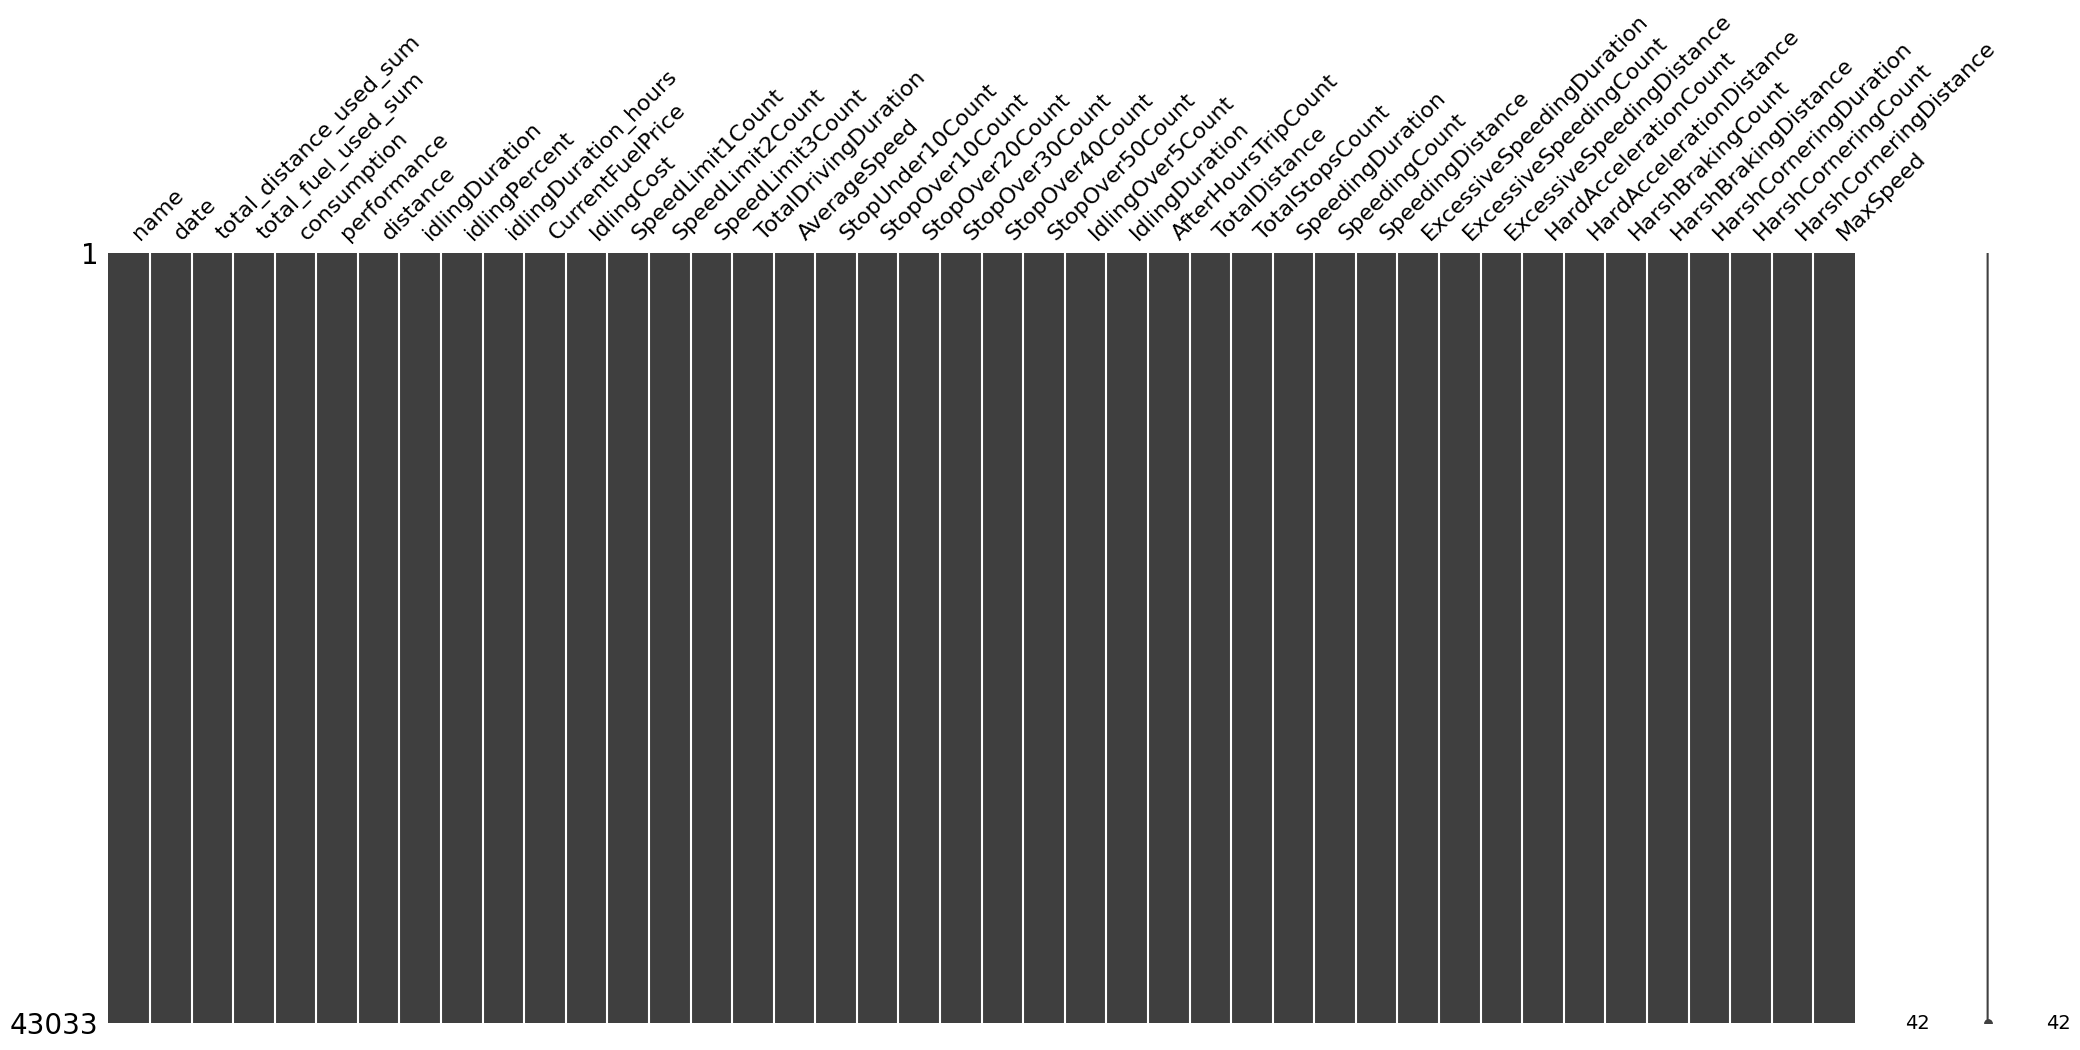

In [ ]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_tabla_unida)
plt.show()

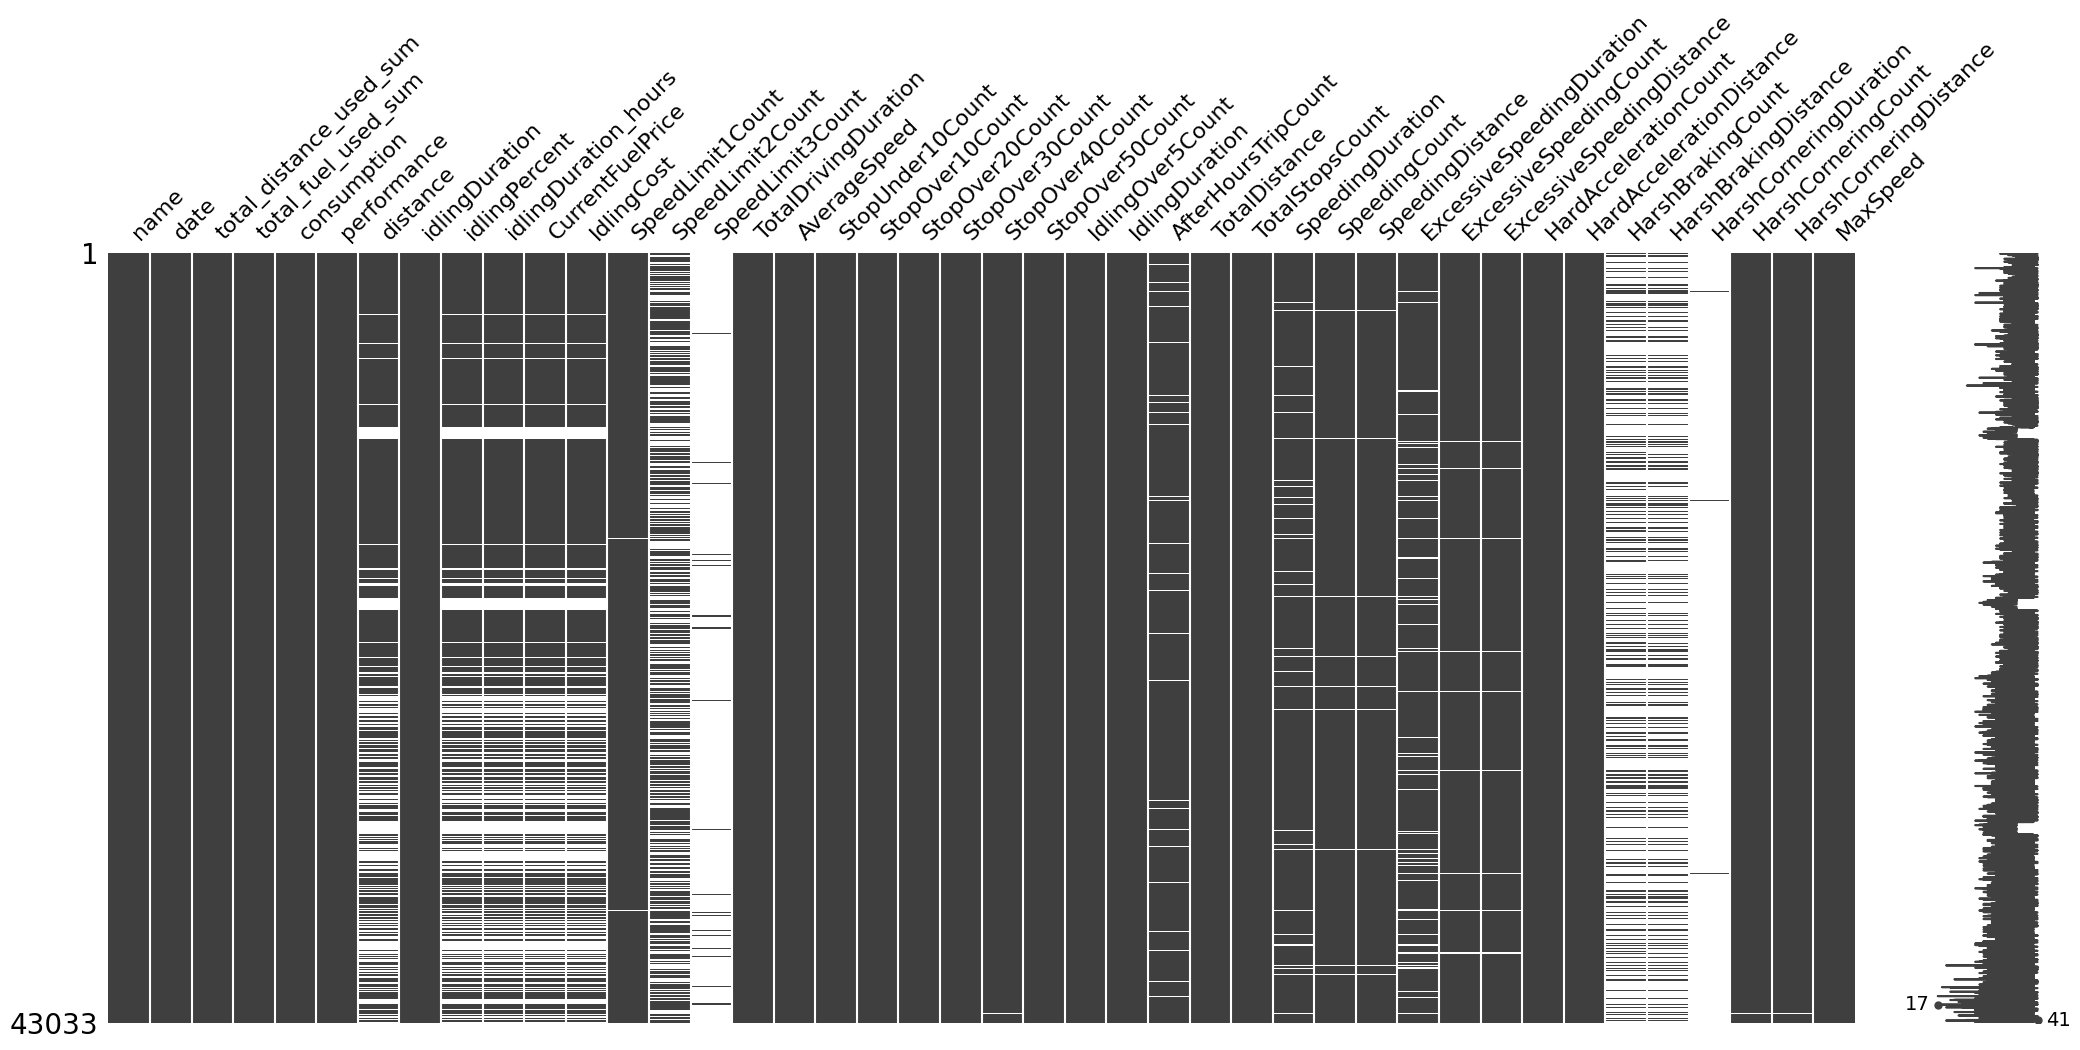

In [ ]:
# Copia del dataframe para reemplazar ceros por NaN
df_zero_as_nan = df_tabla_unida.replace(0, np.nan)

# Visualizar la falta de datos y los ceros
msno.matrix(df_zero_as_nan)
plt.show()

In [ ]:
def verificar_datos(df):
    """
    Verifica duplicados, valores faltantes y filas con valores en cero en el DataFrame.

    Args:
    df (pd.DataFrame): DataFrame a analizar.
    """
    # Verificar si hay filas duplicadas
    filas_duplicadas = df[df.duplicated()]
    numero_filas_duplicadas = len(filas_duplicadas)

    # Verificar si hay valores faltantes
    valores_faltantes = df.isnull().sum()

    # Verificar si hay filas con valores en cero
    filas_con_ceros = df[(df == 0).any(axis=1)]
    numero_filas_con_ceros = len(filas_con_ceros)

    # Verificar cuántos valores en cero hay en cada columna
    valores_en_cero = (df == 0).sum()

    # Imprimir los resultados
    print(f"Número de filas duplicadas: {numero_filas_duplicadas}")
    print("\nValores faltantes por columna:")
    print(valores_faltantes)
    print(f"\nNúmero de filas con al menos un valor en cero: {numero_filas_con_ceros}")
    print("\nValores en cero por columna:")
    print(valores_en_cero)

# Ejemplo de uso
verificar_datos(df_tabla_unida)


Número de filas duplicadas: 2658

Valores faltantes por columna:
name                         0
date                         0
total_distance_used_sum      0
total_fuel_used_sum          0
consumption                  0
performance                  0
distance                     0
idlingDuration               0
idlingPercent                0
idlingDuration_hours         0
CurrentFuelPrice             0
IdlingCost                   0
SpeedLimit1Count             0
SpeedLimit2Count             0
SpeedLimit3Count             0
TotalDrivingDuration         0
AverageSpeed                 0
StopUnder10Count             0
StopOver10Count              0
StopOver20Count              0
StopOver30Count              0
StopOver40Count              0
StopOver50Count              0
IdlingOver5Count             0
IdlingDuration               0
AfterHoursTripCount          0
TotalDistance                0
TotalStopsCount              0
SpeedingDuration             0
SpeedingCount                0
Speed

## Eliminación Inicial de Columnas

Inicialmente, se decide eliminar las columnas `name` y `date` debido a que no aportan información útil para el modelo que se desea construir. Estas variables no están relacionadas directamente con el comportamiento que se desea predecir y, por lo tanto, no proporcionan valor predictivo.

Se elimina la columna `idlingDuration` debido a que contiene la misma información que la variable `idlingDuration_hours`, pero en un formato diferente; la primera está en formato de tiempo y la segunda en decimales.

Además, se opta por eliminar las variables `total_fuel_used_sum` y `total_distance_used_sum` si la variable objetivo es el consumo (`consumption`), ya que esta es derivada de la relación entre ambas. Dado que estas dos variables contienen la misma información que la variable objetivo, podrían introducir redundancia o colinearidad en el modelo, afectando su rendimiento.

La variable `performance` se obtiene dividiendo el total de combustible medido en galones (`total_fuel_used_sum`) entre la distancia total recorrida en millas (`total_distance_used_sum`). Como esta variable se construye a partir de los mismos componentes que la variable objetivo (`consumption`), agrega información redundante y, por lo tanto, también será eliminada.

Finalmente, las variables `IdlingCost` y `CurrentFuelPrice` se eliminan debido a que no agregan información relevante adicional al modelo ni proporcionan insights significativos para mejorar su precisión.




















In [ ]:
# Lista de columnas a eliminar
lista_quitar = ['name', 'date', 'total_fuel_used_sum', 'total_distance_used_sum',
                'performance', 'IdlingCost', 'CurrentFuelPrice', 'idlingDuration']

# Verificar si las columnas están presentes en el DataFrame antes de eliminarlas
columnas_existentes = [col for col in lista_quitar if col in df_tabla_unida.columns]

# Eliminar las columnas existentes
df_tabla_unida.drop(columns=columnas_existentes, inplace=True)

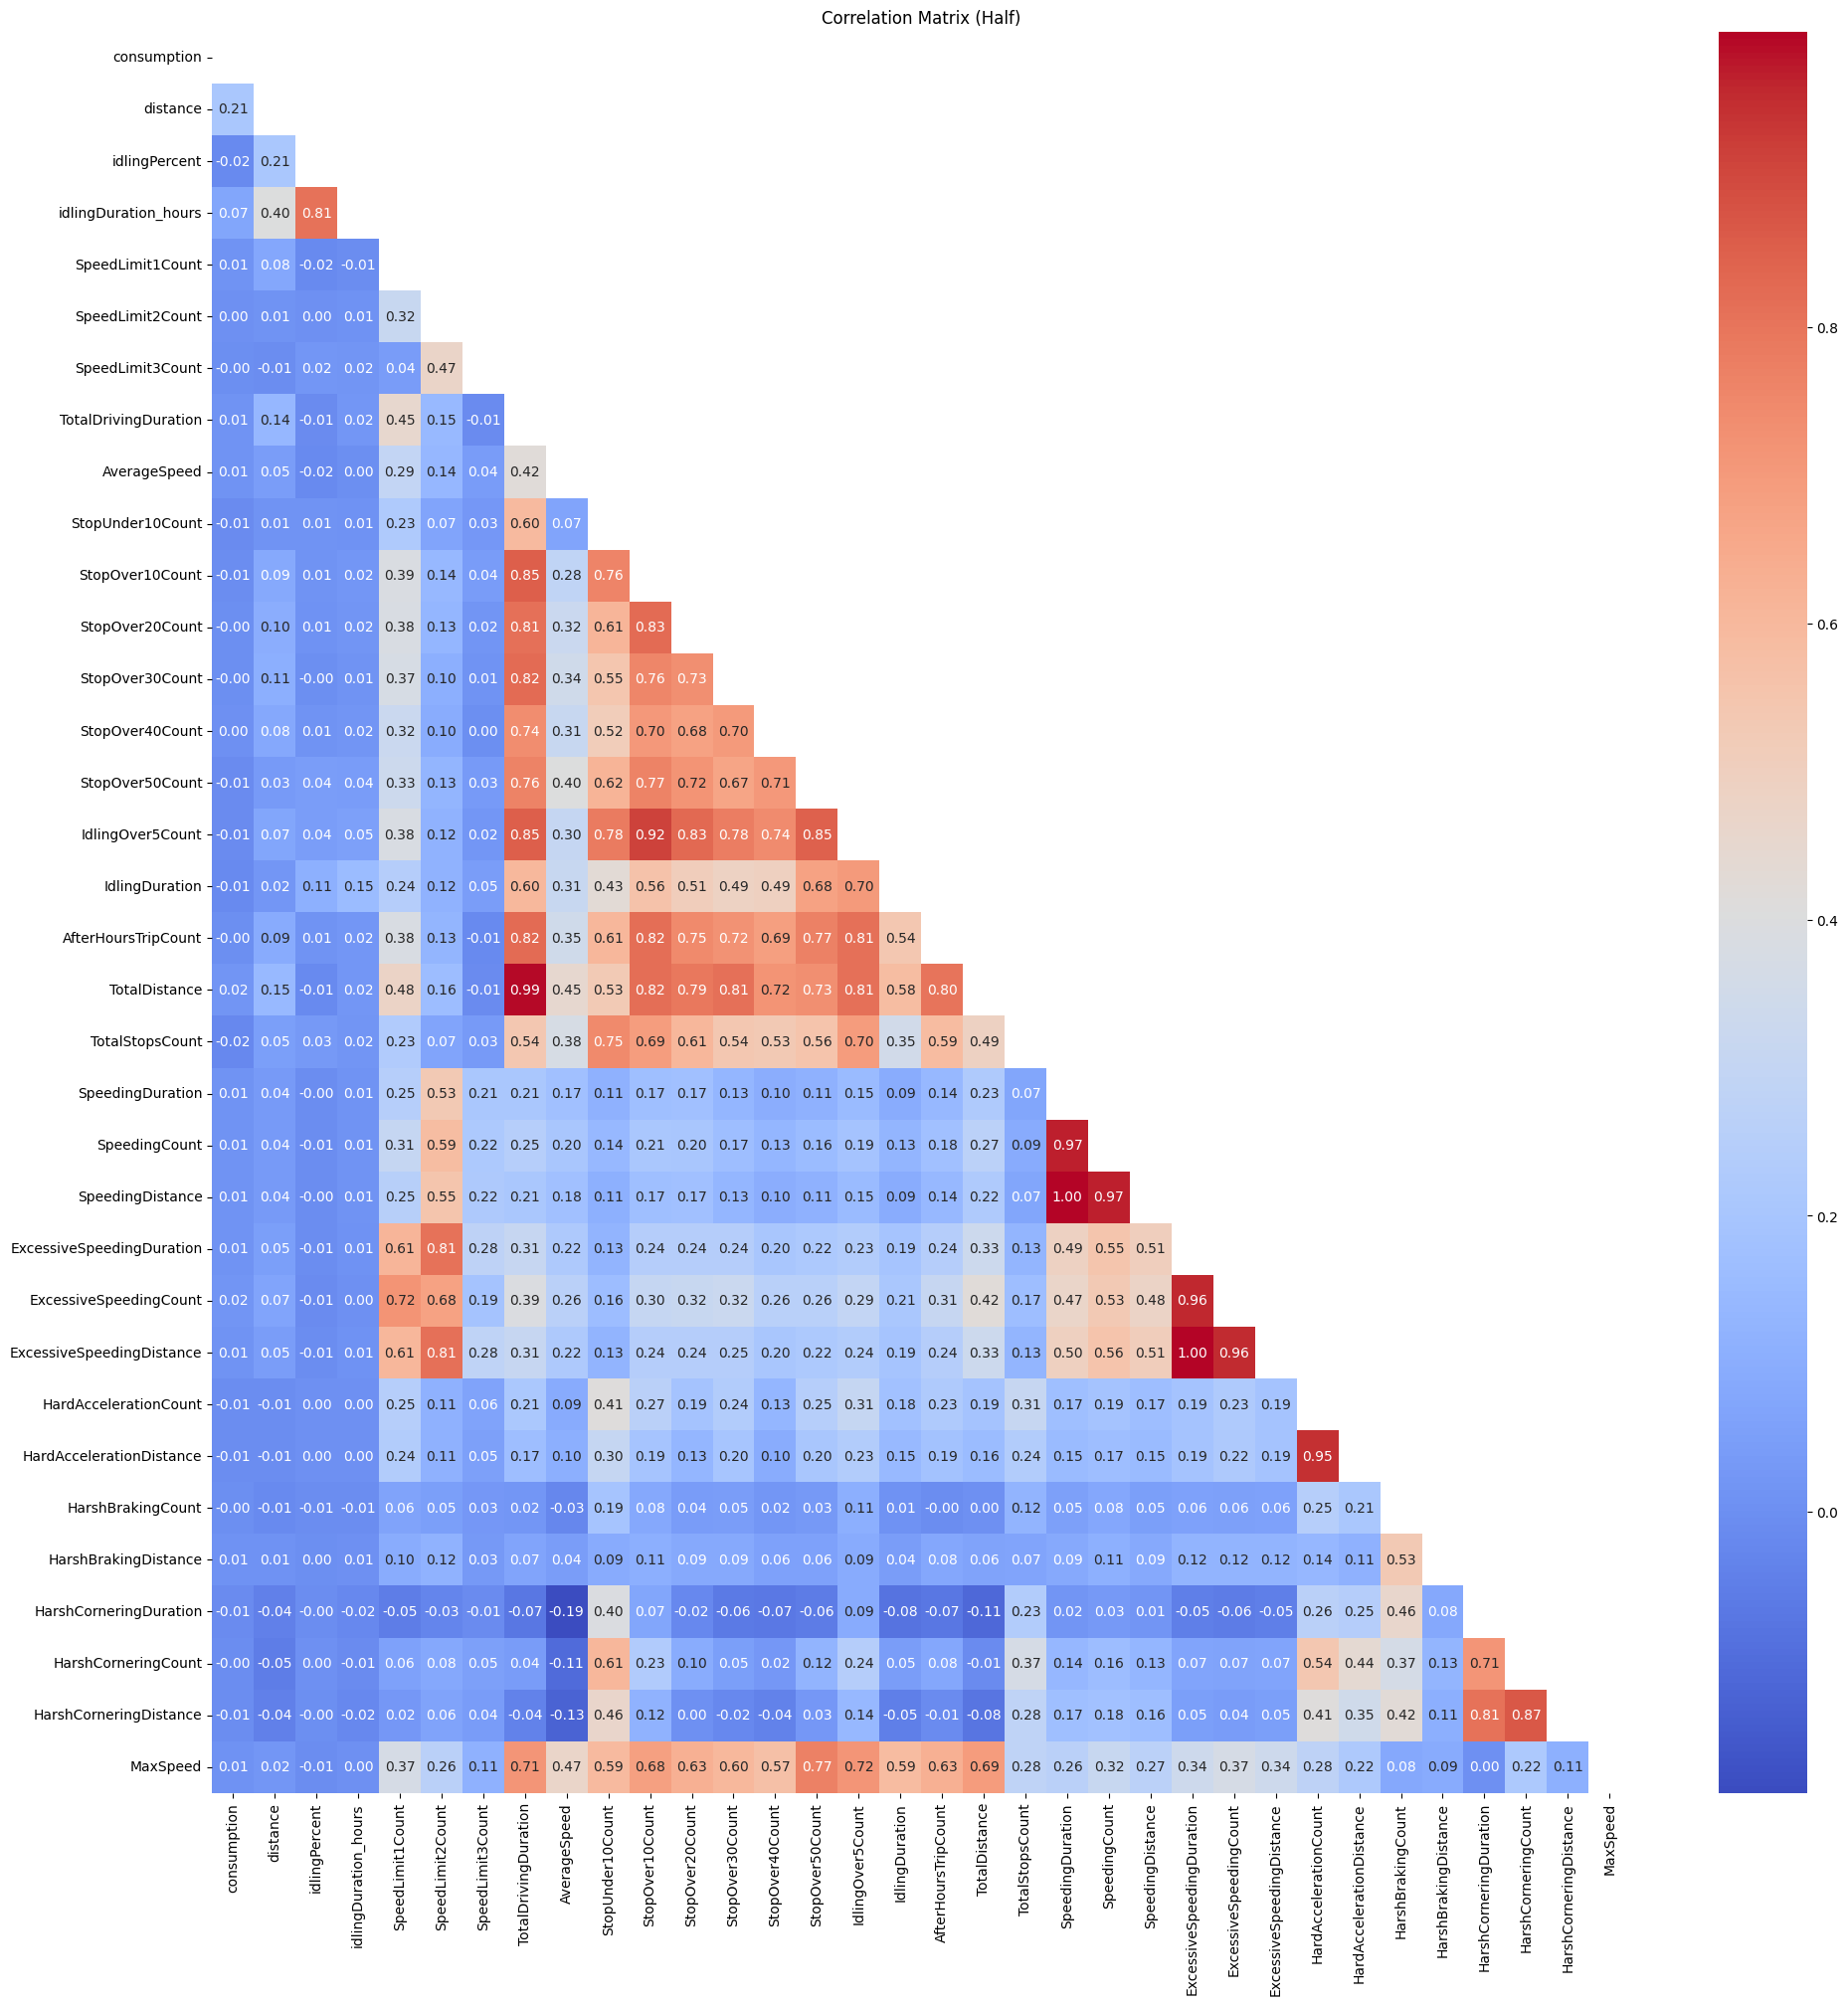

Correlaciones más altas o bajas (por encima del umbral de 0.00):
          consumption  distance  idlingPercent  idlingDuration_hours  \
MaxSpeed        0.007     0.021         -0.007                 0.004   

          SpeedLimit1Count  SpeedLimit2Count  SpeedLimit3Count  \
MaxSpeed             0.371             0.262             0.115   

          TotalDrivingDuration  AverageSpeed  StopUnder10Count  ...  \
MaxSpeed                 0.712         0.467             0.592  ...   

          ExcessiveSpeedingDuration  ExcessiveSpeedingCount  \
MaxSpeed                      0.337                    0.37   

          ExcessiveSpeedingDistance  HardAccelerationCount  \
MaxSpeed                      0.339                  0.278   

          HardAccelerationDistance  HarshBrakingCount  HarshBrakingDistance  \
MaxSpeed                     0.222               0.08                 0.093   

          HarshCorneringDuration  HarshCorneringCount  HarshCorneringDistance  
MaxSpeed               

In [ ]:
def mostrar_matriz_correlacion(df_limpio, x=6, y=5, umbral=0.7):
    # Seleccionar solo las columnas numéricas
    df_limpio_num = df_limpio.select_dtypes(include=['number'])

    # Calcular la matriz de correlación
    correlation_matrix = df_limpio_num.corr()

    # Crear una máscara para ocultar la mitad superior
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Visualizar la matriz de correlación usando un heatmap
    plt.figure(figsize=(x, y))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix (Half)')
    plt.show()

    # Filtrar las correlaciones por el umbral (eliminar correlaciones bajas)
    lower_triangle = correlation_matrix.where(np.tril(np.ones_like(correlation_matrix, dtype=bool)))
    correlaciones_altas_bajas = lower_triangle[(lower_triangle.abs() >= umbral) & (lower_triangle != 1.0)]

    # Eliminar filas y columnas con todas correlaciones bajas o NaN
    correlaciones_altas_bajas = correlaciones_altas_bajas.dropna(how='all').dropna(axis=1, how='all')

    # Eliminar filas y columnas que tengan algún NaN
    correlaciones_altas_bajas = correlaciones_altas_bajas.dropna(how='any').dropna(axis=1, how='any')

    # Imprimir solo las correlaciones filtradas con 3 decimales
    if not correlaciones_altas_bajas.empty:
        print("Correlaciones más altas o bajas (por encima del umbral de {:.2f}):".format(umbral))
        print(correlaciones_altas_bajas.round(3))  # Redondear a 3 decimales
    else:
        print(f"No se encontraron correlaciones por encima del umbral de {umbral}.")



mostrar_matriz_correlacion(df_tabla_unida, 23,23,0)

## Estrategias Iniciales para la Reducción de Complejidad del Modelo

**Variable objetivo: `consumption`**

El análisis se centrará en identificar las variables que tienen una mayor o menor correlación con el consumo y en eliminar aquellas que puedan generar redundancia o complejidad innecesaria en el modelo.

### 1. **Eliminación de Variables con Alta Multicolinealidad**
La multicolinealidad puede ser problemática cuando dos o más variables independientes están altamente correlacionadas, lo que distorsiona la capacidad del modelo para identificar las variables más relevantes para predecir `consumption`. A continuación se presentan algunas correlaciones notables:

- **`ExcessiveSpeedingDistance` y `ExcessiveSpeedingDuration`**: Presentan una correlación muy alta (**r ≈ 1**). Dado que ambas miden aspectos similares, se recomienda seleccionar una de ellas.
- **`SpeedingCount`, `SpeedingDistance` y `SpeedingDuration`**: Estas variables tienen correlaciones superiores a **0.5** entre sí. Conservar solo una de ellas simplificaría el modelo.
- **`StopOver30Count`, `StopOver40Count` y `StopOver50Count`**: Con correlaciones entre **0.6** y **0.8**, se puede eliminar alguna de ellas sin perder información significativa.
- **`HarshCorneringDistance`, `HarshCorneringCount` y `HarshCorneringDuration`**: Al tener correlaciones entre **0.5** y **0.7**, es posible reducir su número.

### 2. **Revisión de Variables con Baja Correlación con `consumption`**
Es fundamental centrarse en las variables que realmente aporten a la predicción de `consumption`. Variables con correlaciones bajas o cercanas a cero probablemente no influyen de manera significativa en el consumo. Algunas observaciones clave:

- **`idlingPercent`**: Tiene una correlación negativa débil con `consumption` (**r ≈ -0.007**), lo que sugiere que no tiene un impacto fuerte en la variable objetivo.
- **`idlingDuration_hours`**: Muestra una correlación baja con `consumption` (**r = 0.004**), indicando que la duración del ralentí podría no ser un factor relevante para el consumo.
- **`SpeedLimit3Count`**: Presenta una correlación relativamente baja con `consumption` (**r = 0.115**), por lo que su impacto en el consumo es mínimo.

### 3. **Variables con Mayor Correlación con `consumption`**
Las siguientes variables tienen una mayor correlación con la variable objetivo, lo que sugiere que son buenos predictores del consumo:

- **`TotalDrivingDuration`**: Alta correlación con `consumption` (**r = 0.712**), lo que indica que la duración total de conducción tiene un fuerte impacto en el consumo.
- **`StopUnder10Count`**: Correlación relativamente alta (**r = 0.592**) con el consumo, lo que sugiere que un mayor número de paradas influye en el consumo.
- **`MaxSpeed`**: También muestra una correlación positiva con el consumo (**r = 0.467**), lo que indica que a mayor velocidad máxima, el consumo aumenta.

### 4. **Posibles Eliminaciones Iniciales**
Con base en el análisis anterior, se proponen las siguientes eliminaciones iniciales para reducir la complejidad del modelo sin comprometer su precisión:

- **`idlingPercent`**: Tiene una correlación muy baja con `consumption` y con otras variables relevantes.
- **`ExcessiveSpeedingDistance` o `ExcessiveSpeedingDuration`**: Elegir una de las dos.
- **`SpeedingDistance`, `SpeedingDuration` o `SpeedingCount`**: Conservar solo una, dada su alta multicolinealidad.
- **`StopOver30Count`, `StopOver40Count`, `StopOver50Count`**: Elegir una o dos para conservar, ya que tienen alta correlación entre ellas.
- **`HarshCorneringDuration`, `HarshCorneringDistance`, `HarshCorneringCount`**: Elegir una o dos para conservar.
- **`AverageSpeed`**: Aunque su correlación con `consumption` no es muy alta (**r = 0.467**), su relevancia debe ser evaluada en función del contexto del problema.

### 5. **Conclusión**
La eliminación de variables redundantes y con baja correlación mejorará la interpretabilidad y eficiencia del modelo, manteniendo aquellas que son más relevantes para predecir el consumo de combustible. Las variables con mayor correlación con `consumption` deben ser priorizadas en el modelo final.

## Eliminación de variables con información redundante

Se eliminará la variable `idlingDuration`, ya que proporciona la misma información que la variable `idlingDuration_hours`, pero en un formato distinto (tiempo).

Asimismo, se eliminarán las variables `name` y `date`, dado que no aportan información relevante para el modelo que se pretende construir.





`'total_distance_used_sum'` > `'total_fuel_used_sum'`

`'idlingDuration_hours'` = `'IdlingCost'`

`'idlingPercent'` < `'IdlingCost'`
`'ExcessiveSpeedingDistance'` `'ExcessiveSpeedingDuration'`

- `'SpeedingCount'`, `'SpeedingDistance'` y `'SpeedingDuration'` tienen correlaciones elevadas entre ellas. Se podría conservar solo una para evitar redundancia.
- `'StopOver30Count'`, `'StopOver40Count'` y `'StopOver50Count'` están altamente correlacionadas, por lo que se podrían eliminar algunas de estas.
- `'HarshCorneringDistance'`, `'HarshCorneringCount'` y `'HarshCorneringDuration'` también presentan una alta correlación entre sí.




# Umbral de Varianza y Selección de Características

Para optimizar la selección de características en el dataset **`df_tabla_unida`**, se propone un pipeline que combina dos enfoques clave: **VarianceThreshold** y **SelectFromModel**, manteniendo el escalamiento de los datos con **MinMaxScaler**. El objetivo es eliminar características redundantes y seleccionar las más relevantes para mejorar el rendimiento del modelo.

## Proceso del Pipeline:

1. **Normalización de los datos**: Se utiliza **MinMaxScaler** para estandarizar las variables del dataset, garantizando que todas las características tengan la misma escala. Esto evita que algunas variables dominen el proceso de selección por tener valores más altos que otras.

2. **Eliminación de características con baja varianza**: El método **VarianceThreshold** filtra las características cuya varianza está por debajo de un umbral predefinido. Las variables con baja varianza tienden a aportar poca información útil, por lo que son eliminadas del modelo para reducir la complejidad.

3. **Selección de características supervisada**: Finalmente, se emplea **SelectFromModel** con un **RandomForestClassifier**. Este clasificador selecciona automáticamente las características más importantes según su relevancia para el modelo, mejorando la precisión al centrarse en las variables más significativas.

## Ventajas del Pipeline:

Este pipeline automatiza el proceso de selección de características, combinando técnicas de preprocesamiento y selección supervisada. Al eliminar características innecesarias y priorizar las más importantes, se mejora tanto la interpretabilidad como el rendimiento del modelo final.

## Inspeccionar la varianza de las columnas

Se decide calcular la varianza de las columnas antes de aplicar el filtro para entender cuáles están siendo eliminadas:

In [ ]:
varianzas = df_tabla_unida.var()
print(varianzas)

consumption                  4.813563e+00
distance                     1.042546e+05
idlingPercent                6.830268e+02
idlingDuration_hours         2.763035e+01
SpeedLimit1Count             8.917580e+05
SpeedLimit2Count             8.410847e+01
SpeedLimit3Count             4.817990e-02
TotalDrivingDuration         1.046065e+08
AverageSpeed                 6.814751e+01
StopUnder10Count             8.381749e+03
StopOver10Count              9.815489e+02
StopOver20Count              1.789527e+02
StopOver30Count              1.237309e+02
StopOver40Count              5.554837e+01
StopOver50Count              1.445492e+03
IdlingOver5Count             1.416898e+04
IdlingDuration               1.910208e+08
AfterHoursTripCount          1.329321e+04
TotalDistance                9.435022e+07
TotalStopsCount              1.919341e+04
SpeedingDuration             4.043302e+02
SpeedingCount                5.565346e+02
SpeedingDistance             5.144368e+02
ExcessiveSpeedingDuration    1.432

Las varianzas de las columnas indican que algunas características tienen valores extremadamente bajos, lo que provoca que el paso de **VarianceThreshold** pueda eliminar demasiadas variables. En particular, varianzas como las de **HarshBrakingDistance** o **HarshCorneringDuration** son muy pequeñas y caen por debajo del umbral de 0.1.

### Estrategia para abordar este problema:

**Ajustar el umbral de varianza**: Dado que algunas características tienen varianzas pequeñas pero no necesariamente insignificantes, se decide reducir el umbral de varianza a un valor más bajo, como 0.001, para retener dichas variables que aún pueden aportar información al modelo.

# Selección de características

Este código está diseñado para **preprocesar un conjunto de datos** eliminando características redundantes o irrelevantes antes de construir un modelo de regresión. Utiliza técnicas de **normalización**, **reducción de dimensionalidad** (mediante filtrado de varianza) y **selección de características** basada en un modelo de bosque aleatorio.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Definir las columnas a transformar (todas las que tienen valores numéricos)
columns = ['distance', 'idlingPercent', 'idlingDuration_hours',
           'SpeedLimit1Count', 'SpeedLimit2Count', 'SpeedLimit3Count', 'TotalDrivingDuration',
           'AverageSpeed', 'StopUnder10Count', 'StopOver10Count', 'StopOver20Count',
           'StopOver30Count', 'StopOver40Count', 'StopOver50Count', 'IdlingOver5Count',
           'IdlingDuration', 'AfterHoursTripCount', 'TotalDistance', 'TotalStopsCount',
           'SpeedingDuration', 'SpeedingCount', 'SpeedingDistance', 'ExcessiveSpeedingDuration',
           'ExcessiveSpeedingCount', 'ExcessiveSpeedingDistance', 'HardAccelerationCount',
           'HardAccelerationDistance', 'HarshBrakingCount', 'HarshBrakingDistance',
           'HarshCorneringDuration', 'HarshCorneringCount', 'HarshCorneringDistance', 'MaxSpeed']

# Separar las características (X) y la variable objetivo (y)
X = df_tabla_unida.drop('consumption', axis=1)
y = df_tabla_unida['consumption']

# Crear pipeline que normaliza, filtra por varianza y selecciona características importantes
pipeline = Pipeline(steps=[
    ('scaler', ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), columns)
    ], remainder='passthrough')),  # Escalar las columnas numéricas
    ('variance_threshold', VarianceThreshold(threshold=0.0001)),  # Eliminar características con baja varianza
    ('feature_selection', SelectFromModel(RandomForestRegressor(n_estimators=100)))  # Cambiado a regresor
])

# Aplicar el pipeline al DataFrame
df_transformed = pipeline.fit_transform(X, y)

# Obtener las columnas seleccionadas
selected_features = pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_columns = X.columns[selected_features]

# Obtener las columnas no seleccionadas
non_selected_columns = X.columns[~pipeline.named_steps['feature_selection'].get_support()]

# Convertir el resultado a DataFrame nuevamente con las columnas seleccionadas
df_transformed = pd.DataFrame(df_transformed, columns=selected_columns)

# Ver el resultado transformado
print("Características seleccionadas:")
print(selected_columns)

print("\nCaracterísticas no seleccionadas:")
print(non_selected_columns)

print("\nResultado transformado:")
print(df_transformed.head())

# Importancia de las características antes de la selección
importances = pipeline.named_steps['feature_selection'].estimator_.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nImportancia de las características antes de la selección:")
print(importance_df)

# Resumen estadístico del DataFrame transformado
print("\nResumen estadístico del DataFrame transformado:")
print(df_transformed.describe())

# Evaluar el modelo con las características seleccionadas
from sklearn.model_selection import cross_val_score

# Calcular el R^2 del modelo
r2_score = cross_val_score(pipeline.named_steps['feature_selection'].estimator_, X, y, cv=5, scoring='r2')
print("\nR^2 del modelo tras la selección de características:")
print(r2_score.mean())

# Calcular el error cuadrático medio (MSE) del modelo
from sklearn.metrics import mean_squared_error

pipeline.named_steps['feature_selection'].estimator_.fit(X, y)
y_pred = pipeline.named_steps['feature_selection'].estimator_.predict(X)
mse = mean_squared_error(y, y_pred)

print("\nError cuadrático medio (MSE) tras la selección de características:")
print(mse)

Características seleccionadas:
Index(['distance', 'idlingPercent', 'idlingDuration_hours', 'IdlingDuration'], dtype='object')

Características no seleccionadas:
Index(['SpeedLimit1Count', 'SpeedLimit2Count', 'SpeedLimit3Count',
       'TotalDrivingDuration', 'AverageSpeed', 'StopUnder10Count',
       'StopOver10Count', 'StopOver20Count', 'StopOver30Count',
       'StopOver40Count', 'StopOver50Count', 'IdlingOver5Count',
       'AfterHoursTripCount', 'TotalDistance', 'TotalStopsCount',
       'SpeedingDuration', 'SpeedingCount', 'SpeedingDistance',
       'ExcessiveSpeedingDuration', 'ExcessiveSpeedingCount',
       'ExcessiveSpeedingDistance', 'HardAccelerationCount',
       'HardAccelerationDistance', 'HarshBrakingCount', 'HarshBrakingDistance',
       'HarshCorneringDuration', 'HarshCorneringCount',
       'HarshCorneringDistance', 'MaxSpeed'],
      dtype='object')

Resultado transformado:
   distance  idlingPercent  idlingDuration_hours  IdlingDuration
0  0.017094           0.87   

In [ ]:
pipeline

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['distance', 'idlingPercent',
                                                   'idlingDuration_hours',
                                                   'SpeedLimit1Count',
                                                   'SpeedLimit2Count',
                                                   'SpeedLimit3Count',
                                                   'TotalDrivingDuration',
                                                   'AverageSpeed',
                                                   'StopUnder10Count',
                                                   'StopOver10Count',
                                                   'StopOver20Count',
                                                   'StopOver30Count',
                                                   'StopOver40Count',
                                                   'StopOver...
                                                   'SpeedingDistance',
                                                   'ExcessiveSpeedingDuration',
                                                   'ExcessiveSpeedingCount',
                                                   'ExcessiveSpeedingDistance',
                                                   'HardAccelerationCount',
                                                   'HardAccelerationDistance',
                                                   'HarshBrakingCount',
                                                   'HarshBrakingDistance',
                                                   'HarshCorneringDuration', ...])])),
                ('variance_threshold', VarianceThreshold(threshold=0.0001)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestRegressor()))])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd

# Definir las columnas a transformar (todas las que tienen valores numéricos)
columns = ['distance', 'idlingPercent', 'idlingDuration_hours',
           'SpeedLimit1Count', 'SpeedLimit2Count', 'SpeedLimit3Count', 'TotalDrivingDuration',
           'AverageSpeed', 'StopUnder10Count', 'StopOver10Count', 'StopOver20Count',
           'StopOver30Count', 'StopOver40Count', 'StopOver50Count', 'IdlingOver5Count',
           'IdlingDuration', 'AfterHoursTripCount', 'TotalDistance', 'TotalStopsCount',
           'SpeedingDuration', 'SpeedingCount', 'SpeedingDistance', 'ExcessiveSpeedingDuration',
           'ExcessiveSpeedingCount', 'ExcessiveSpeedingDistance', 'HardAccelerationCount',
           'HardAccelerationDistance', 'HarshBrakingCount', 'HarshBrakingDistance',
           'HarshCorneringDuration', 'HarshCorneringCount', 'HarshCorneringDistance', 'MaxSpeed']

# Separar las características (X) y la variable objetivo (y)
X = df_tabla_unida.drop('consumption', axis=1)
y = df_tabla_unida['consumption']

# Crear un pipeline con Lasso para la selección de características
lasso_pipeline = Pipeline(steps=[
    ('scaler', ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), columns)
    ], remainder='passthrough')),  # Escalar las columnas numéricas
    ('feature_selection', SelectFromModel(Lasso(alpha=0.01)))  # Usar Lasso para seleccionar características
])

# Aplicar el pipeline con Lasso
df_transformed_lasso = lasso_pipeline.fit_transform(X, y)

# Obtener las columnas seleccionadas por Lasso
selected_features_lasso = lasso_pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_columns_lasso = X.columns[selected_features_lasso]

# Ver las características seleccionadas por Lasso
print("Características seleccionadas por Lasso:")
print(selected_columns_lasso)

# Evaluar el modelo de Lasso
r2_lasso = cross_val_score(lasso_pipeline.named_steps['feature_selection'].estimator_, X, y, cv=5, scoring='r2')
print("\nR^2 del modelo Lasso tras la selección de características:")
print(r2_lasso.mean())

# Calcular el MSE para Lasso
lasso_pipeline.named_steps['feature_selection'].estimator_.fit(X, y)
y_pred_lasso = lasso_pipeline.named_steps['feature_selection'].estimator_.predict(X)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print("\nError cuadrático medio (MSE) del modelo Lasso tras la selección de características:")
print(mse_lasso)

# Crear un pipeline con Ridge para la selección de características
ridge_pipeline = Pipeline(steps=[
    ('scaler', ColumnTransformer(transformers=[
        ('num', MinMaxScaler(), columns)
    ], remainder='passthrough')),  # Escalar las columnas numéricas
    ('feature_selection', SelectFromModel(Ridge(alpha=1.0)))  # Usar Ridge para seleccionar características
])

# Aplicar el pipeline con Ridge
df_transformed_ridge = ridge_pipeline.fit_transform(X, y)

# Obtener las columnas seleccionadas por Ridge
selected_features_ridge = ridge_pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_columns_ridge = X.columns[selected_features_ridge]

# Ver las características seleccionadas por Ridge
print("\nCaracterísticas seleccionadas por Ridge:")
print(selected_columns_ridge)

# Evaluar el modelo de Ridge
r2_ridge = cross_val_score(ridge_pipeline.named_steps['feature_selection'].estimator_, X, y, cv=5, scoring='r2')
print("\nR^2 del modelo Ridge tras la selección de características:")
print(r2_ridge.mean())

# Calcular el MSE para Ridge
ridge_pipeline.named_steps['feature_selection'].estimator_.fit(X, y)
y_pred_ridge = ridge_pipeline.named_steps['feature_selection'].estimator_.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)

print("\nError cuadrático medio (MSE) del modelo Ridge tras la selección de características:")
print(mse_ridge)

# Análisis de Componentes Principales (PCA)

Para aplicar el **Análisis de Componentes Principales (PCA)** en un pipeline de `sklearn`, se añade el paso de PCA después de la normalización de las características numéricas. Este método es útil cuando las características están correlacionadas y se busca reducir la dimensionalidad manteniendo la mayor parte de la variabilidad.

El enfoque incluye filtrar las columnas no numéricas para evitar errores, y luego aplicar normalización y PCA exclusivamente a las columnas numéricas. La normalización asegura que los valores estén dentro de un rango común, mientras que PCA reduce la dimensionalidad al conservar la mayor parte de la información contenida en los datos originales.

Este proceso mejora la eficiencia del modelo al eliminar redundancias y simplificar la interpretación de los datos. El uso de pipelines facilita la reproducibilidad, modularidad y escalabilidad del flujo de trabajo, permitiendo implementar cambios o mejoras en el futuro sin complicaciones.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import pandas as pd

# Filtrar las columnas numéricas, excluyendo las no numéricas (como fechas)
df_tabla_unida_numeric = df_tabla_unida.select_dtypes(include=['float64', 'int64'])

# Número de componentes principales que queremos mantener
n_components_pca = 4

# Crear el pipeline para consumo con PCA
pipeline_consumption = Pipeline(steps=[
    ('scaler', MinMaxScaler()), # Aplicamos MinMaxScaler
    ('pca', PCA(n_components=n_components_pca)) # Aplicamos PCA
])

# Aplicar los pipelines a los DataFrames respectivos (solo con columnas numéricas)
df_tabla_unida_pca = pipeline_consumption.fit_transform(df_tabla_unida_numeric)

# Convertir los resultados de PCA nuevamente a DataFrames
df_tabla_unida_pca = pd.DataFrame(df_tabla_unida_pca, columns=[f'PC{i+1}' for i in range(n_components_pca)])
# Mostrar las primeras filas de cada DataFrame transformado
df_tabla_unida_pca.head()


,PC1,PC2,PC3,PC4
0,0.490637,0.519936,-0.017120,-0.328142
1,-0.136099,0.331249,-0.225558,-0.157313
2,-0.667589,0.438746,0.103276,0.211339
3,-0.892332,-0.082573,-0.043999,0.185961
4,0.322073,0.799154,0.559546,0.031577


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd

# Filtrar las columnas numéricas de df_tabla_unida, excluyendo las no numéricas (como fechas)
df_tabla_unida_numeric = df_tabla_unida.select_dtypes(include=['float64', 'int64'])

# Número de componentes principales que queremos mantener
n_components_pca = 4

# Crear el pipeline para df_tabla_unida con PCA
pipeline_tabla_unida = Pipeline(steps=[
    ('scaler', MinMaxScaler()),  # Aplicamos MinMaxScaler
    ('pca', PCA(n_components=n_components_pca))  # Aplicamos PCA
])

# Aplicar el pipeline al DataFrame df_tabla_unida (solo con columnas numéricas)
df_tabla_unida_pca = pipeline_tabla_unida.fit_transform(df_tabla_unida_numeric)

# Convertir los resultados de PCA nuevamente a DataFrame
df_tabla_unida_pca = pd.DataFrame(df_tabla_unida_pca, columns=[f'PC{i+1}' for i in range(n_components_pca)])

# Mostrar las primeras filas del DataFrame transformado
print(df_tabla_unida_pca.head())

        PC1       PC2       PC3       PC4
0  0.490637  0.519936 -0.017120 -0.328142
1 -0.136099  0.331249 -0.225558 -0.157313
2 -0.667589  0.438746  0.103276  0.211339
3 -0.892332 -0.082573 -0.043999  0.185961
4  0.322073  0.799154  0.559546  0.031577


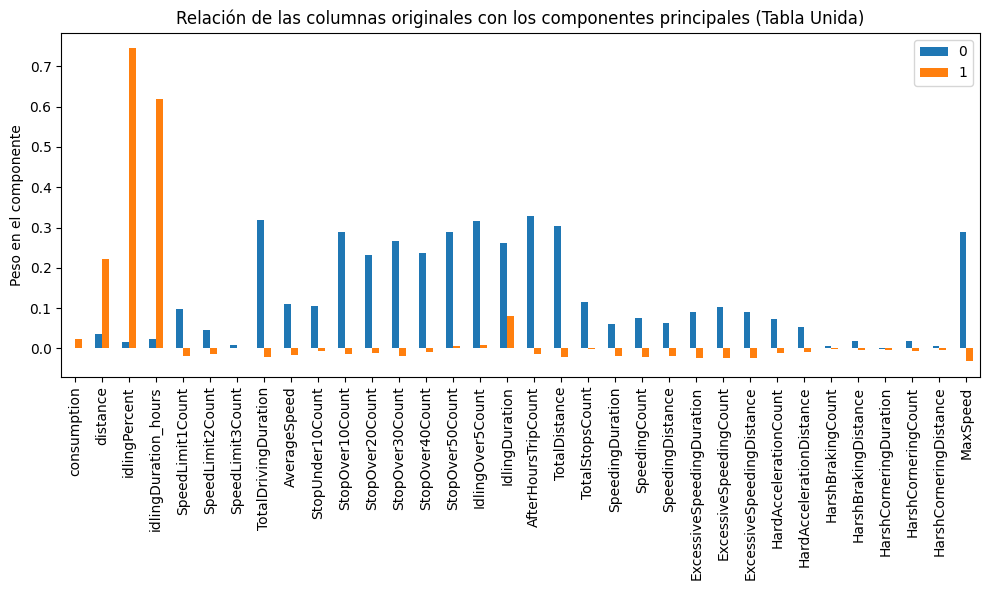

In [ ]:
import matplotlib.pyplot as plt

# Filtrar las columnas numéricas de df_tabla_unida, excluyendo las no numéricas (como fechas)
df_tabla_unida_numeric = df_tabla_unida.select_dtypes(include=['float64', 'int64'])

# Obtener los nombres de las columnas originales
columns_tabla_unida = df_tabla_unida_numeric.columns

# Acceder al componente del PCA para df_tabla_unida desde el pipeline
pca_tabla_unida = pipeline_tabla_unida.named_steps['pca']

# Convertir los componentes en un DataFrame para facilitar la visualización
df_pca_tabla_unida = pd.DataFrame(pca_tabla_unida.components_, columns=columns_tabla_unida)

# Graficar los pesos de las columnas originales en los primeros dos componentes principales
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Gráfico para df_tabla_unida
df_pca_tabla_unida.iloc[0:2].T.plot(kind='bar', ax=ax)
ax.set_title('Relación de las columnas originales con los componentes principales (Tabla Unida)')
ax.set_ylabel('Peso en el componente')

# Ajustar el diseño de la figura para que se vea mejor
plt.tight_layout()
plt.show()

## Interpretación del Gráfico de Componentes Principales

El gráfico resultante muestra la relación entre las columnas originales de `df_tabla_unida` y los dos primeros componentes principales (PC1 y PC2) generados por PCA. La interpretación de este gráfico se puede abordar de la siguiente manera:

### 1. Ejes del Gráfico
- **Eje Y**: Representa el peso o la carga de cada columna original en los componentes principales. Un valor más alto indica que la columna tiene una mayor influencia en el componente principal.
- **Categorías en el Eje X**: Cada barra representa una columna original del DataFrame `df_tabla_unida`.

### 2. Altura de las Barras
- **Barras Altas**: Indican que la columna original tiene una gran contribución al componente principal. Esto significa que esa variable tiene una gran importancia en la variación explicada por ese componente.
- **Barras Bajas**: Sugieren que la columna tiene poca o ninguna influencia en el componente principal. Es posible que esas variables no sean relevantes para explicar la variabilidad en los datos.

### 3. Comparación Entre Componentes
- Si el gráfico muestra dos componentes principales (PC1 y PC2), se puede observar qué columnas son más influyentes en cada uno. Por ejemplo:
  - **PC1** puede capturar la mayor parte de la variabilidad en los datos, por lo que las columnas con cargas altas en este componente son críticas para entender la estructura de los datos.
  - **PC2** puede capturar variabilidad adicional, por lo que las columnas con altas cargas en este componente pueden revelar patrones diferentes o complementarios.

### 4. Significado de la Carga
- **Carga Positiva y Negativa**:
  - Las barras que se extienden hacia arriba representan una carga positiva, indicando que un aumento en esa variable está asociado con un aumento en el componente principal.
  - Las barras que se extienden hacia abajo indican una carga negativa, sugiriendo que un aumento en la variable está asociado con una disminución en el componente.

### 5. Identificación de Variables Importantes
- El gráfico permite identificar rápidamente cuáles son las variables más relevantes para los componentes principales. Esto puede ayudar en la selección de características, priorizando las variables con mayor carga para análisis posteriores o modelado.


### Conclusión
El gráfico proporciona una visión clara de cómo las variables originales contribuyen a la estructura de los datos a través de los componentes principales. Interpretarlo adecuadamente puede facilitar decisiones sobre la importancia de las características en el análisis y en la modelización de datos.

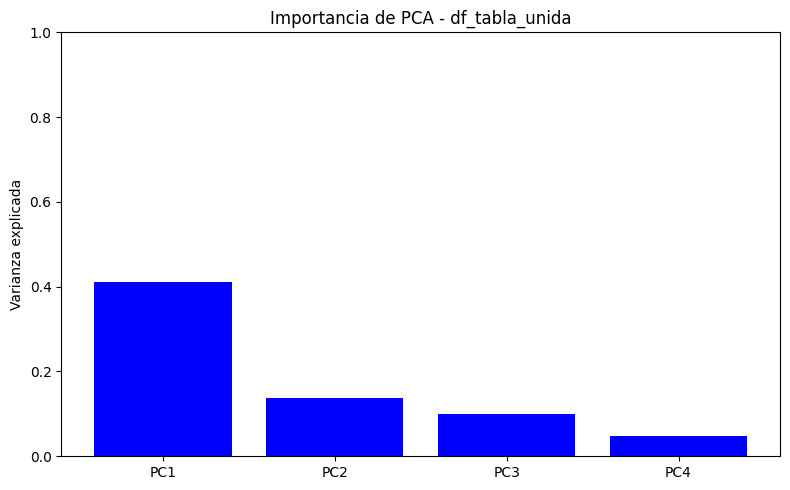

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Número de componentes principales que queremos mantener
n_components_pca = 4

# Crear el pipeline para df_tabla_unida con PCA
pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler()),  # Escalamos los datos
    ('pca', PCA(n_components=n_components_pca))  # Aplicamos PCA
])

# Filtrar las columnas numéricas de df_tabla_unida
df_tabla_unida_numeric = df_tabla_unida.select_dtypes(include=['float64', 'int64'])

# Ajustar el pipeline a df_tabla_unida
df_tabla_unida_pca = pipeline.fit_transform(df_tabla_unida_numeric)

# Obtener la varianza explicada del PCA
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

# Graficar la importancia de los componentes
fig, ax = plt.subplots(figsize=(8, 5))

# Etiquetas de los componentes
components = [f'PC{i+1}' for i in range(n_components_pca)]

# Gráfico de la varianza explicada por los componentes principales
ax.bar(components, explained_variance, color='b')
ax.set_title('Importancia de PCA - df_tabla_unida')
ax.set_ylabel('Varianza explicada')
ax.set_ylim([0, 1])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

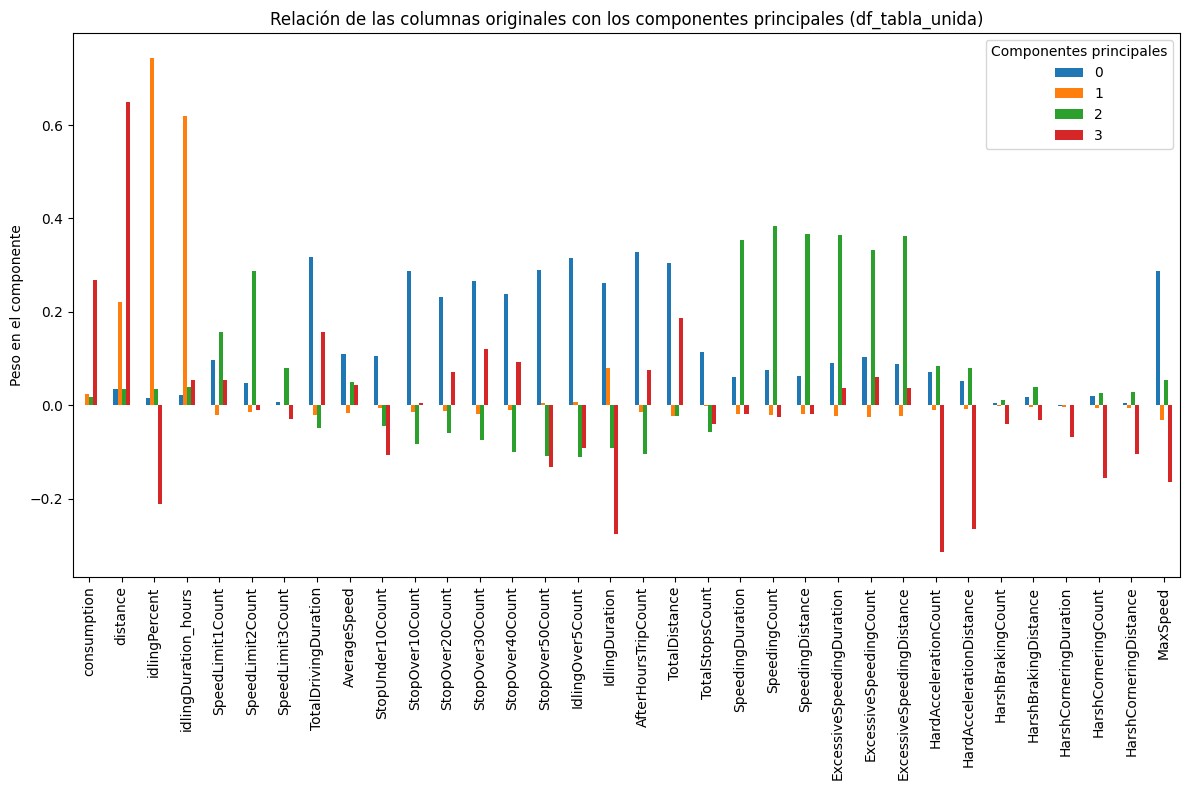

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Acceder a los componentes del PCA del pipeline ya entrenado
pca = pipeline.named_steps['pca']

# Obtener los nombres de las columnas originales
columns = df_tabla_unida_numeric.columns

# Convertir los componentes en un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(pca.components_, columns=columns)

# Graficar los pesos de las columnas originales en los primeros cuatro componentes principales
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Graficar los primeros cuatro componentes principales
df_pca.iloc[0:4].T.plot(kind='bar', ax=ax)
ax.set_title('Relación de las columnas originales con los componentes principales (df_tabla_unida)')
ax.set_ylabel('Peso en el componente')
ax.legend(title="Componentes principales", loc='upper right')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

Beneficios generales del uso de PCA:

- Reducción de la dimensionalidad: Al reducir el número de variables (dimensiones), haces que el modelo sea más simple y rápido de entrenar, además de evitar problemas como la multicolinealidad (cuando dos o más variables están altamente correlacionadas).
- Mejora de la interpretabilidad: Con menos variables, es más fácil analizar e interpretar el comportamiento de los datos.
- Optimización del rendimiento del modelo: Al eliminar características redundantes, puedes mejorar el rendimiento del modelo, ya que se reducen las dimensiones no informativas.

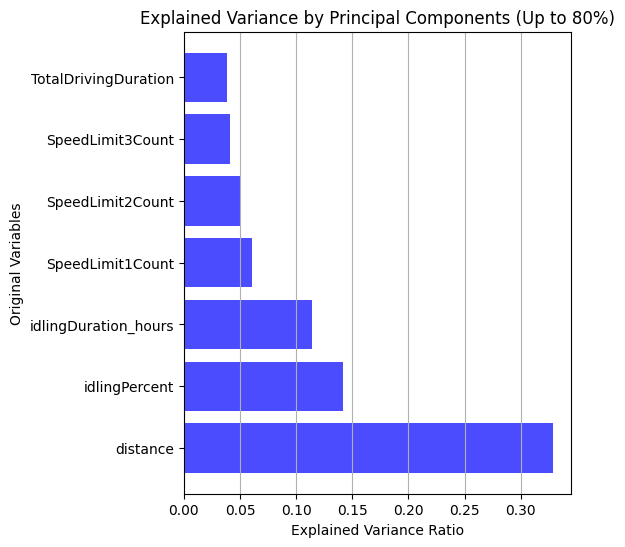

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Seleccionar solo las columnas numéricas relevantes, excluyendo la variable de salida 'consumption'
df_numeric =  df_tabla_unida.drop(columns=['consumption'])

# Paso 3: Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Paso 4: Realizar el PCA
pca = PCA()
pca.fit(df_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Paso 5: Ordenar las variancias explicadas de mayor a menor y calcular la varianza acumulada
explained_variance_sorted_indices = np.argsort(explained_variance)[::-1]  # Índices de mayor a menor
explained_variance_sorted = explained_variance[explained_variance_sorted_indices]
cumulative_variance = np.cumsum(explained_variance_sorted)

# Seleccionar los componentes que explican hasta el 80% de la varianza
components_to_80_percent = np.where(cumulative_variance <= 0.80)[0]

# Obtener las variables originales y la varianza explicada correspondiente
original_columns = df_numeric.columns
selected_variance = explained_variance_sorted[components_to_80_percent]
selected_variables = original_columns[explained_variance_sorted_indices[components_to_80_percent]]

# Paso 6: Generar el gráfico de barras horizontal de los componentes seleccionados
plt.figure(figsize=(5, 6))
plt.barh(range(len(selected_variance)), selected_variance, alpha=0.7, align='center', color='blue', tick_label=selected_variables)
plt.title('Explained Variance by Principal Components (Up to 80%)')
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Original Variables')
plt.grid(True, axis='x')

# Mostrar el gráfico
plt.show()
